In [142]:
import requests
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import urllib.request
from selenium import webdriver
import pandas as pd
import csv
import time
import operator
import re
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(50)

In [53]:
#main sourcde url 
#construction accident -> search keyword
m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20191231&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20140702&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20100207&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20070626&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20040524&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20000605&query=%22construction%22%20accident&sort=newest&startDate=20000101"

In [54]:
session = requests.Session()
req=session.get(m_url) #default is s_url
soup = BeautifulSoup(req.text, 'html.parser')

#stream-panel > div.css-13mho3u > ol > li:nth-child(2) > div > div.css-1l4spti > a
#stream-panel > div.css-13mho3u > ol > li:nth-child(1) > div > div.css-1l4spti > a


In [55]:

chrome_options = webdriver.ChromeOptions
#chrome_options.add_argument("--incognito")
driver = webdriver.Chrome(executable_path='/Users/macbookpro/Project_construction/chromedriver')

link = []
driver.get(m_url)
time.sleep(3)
for i in range(110) :
    a = driver.page_source
    b = BeautifulSoup(a, 'html.parser')
    #stream-panel > div.css-13mho3u > ol > li:nth-child(1) > div > div.css-1l4spti > a
    #stream-panel > div.css-13mho3u > ol > li > div > div.css-1l4spti > a
    #site-content > div > div:nth-child(2) > div.css-46b038 > ol > li:nth-child(1) > div > div > div > a
    c = b.select('#site-content > div >div>div> ol >li> div > div > div > a')
    
    for j in range(len(c)) :
        if c[j].attrs['href'] not in link :
            link.append(c[j].attrs['href'])
        else :
            pass
    
    driver.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/div/button').click()
    time.sleep(3)

#link

In [56]:
#link_source = link 
#a_link = link
#b_link = link
#c_link = link
#d_link = link
#e_link = link
#f_link = link
#print(len(f_link))
g_link = link
len(g_link)

1010

In [73]:
total_link = []
total_link.extend(g_link)
total_link.extend(b_link)
total_link.extend(c_link)
total_link.extend(d_link)
total_link.extend(e_link)
total_link.extend(f_link)


In [74]:
total_link
len(total_link)

5132

In [76]:
res = []
for a in total_link :
    if a not in res :
        res.append(a)


In [78]:
len(res)

5132

In [95]:
def removing_url(s_link):

    diff_link = []

#delete unsupported news 
    for i in range (len(s_link)) :
        #print(a_link[i])
        if s_link[i][1] != '2':
        
            diff_link.append(s_link[i])
            

    for j in range(len(diff_link)):
        if diff_link[j] in s_link:
            s_link.remove(diff_link[j])
        
    return s_link


In [110]:
new_f =removing_url(f_link)

In [119]:
print(len(total_link))
print("this is the number of unsupportive link " + str(len(diff_link)))

4565
this is the number of unsupportive link 567


In [86]:
## This is main source for analyzing article

class ArticleInfo():
    
    def __init__(self, s_url) :
        
        session = requests.Session()
        req=session.get(s_url)
        self.soup = BeautifulSoup(req.text, 'html.parser')
    
    
    def article_body(self) :
        body = self.soup.find('div', {'class' : 'StoryBodyCompanionColumn'})
        finalContent =''
    
        if body is not None :
            for itcontents in self.soup.findAll('p'):
                if itcontents == None :
                    continue
                content = itcontents.getText()
                content = re.sub(r"\n+", "", content)
                finalContent +=content
        else :
            return False
        
        return finalContent

##reference: https://github.com/subhendusethi/nytimes-article-crawler/blob/master/crawler/nytimescrawler.py    

    def article_title(self):
        titles = self.soup.select('title',{"data-rh":"true"})
        for title in titles:
            title = title.getText()
            break
        return title

    def article_date(self) :
  
        date = self.soup.find('li',{'class':'date'})
        if date != None :
            date = date.getText()
            
        else :
            date = self.soup.find('meta',{'name':'pdate'})
            if date !=None :
                date = date.get('content')
                if date !=None :
                    date = str(date)
                else:
                    none= "none"
                    datelist.append(none)
                
        return date

 

In [91]:
def scraping(source_link):
    titles =[]
    bodies =[]
    datelist=[]

    for s_url in source_link :
        s_url = 'https://www.nytimes.com'+s_url
        ob = ArticleInfo(s_url)
    
        body =ob.article_body()
        bodies.append(body)
    
        date = ob.article_date()
        datelist.append(date)
    
        title = ob.article_title()
        titles.append(title)
    return bodies, datelist, titles

In [111]:
#body, date, title = scraping(new_f)
#g_body = body
#g_date = date
#g_title = title

#b_body = body
#b_date = date
#b_title = title

#c_body = body
#c_date = date
#c_title = title

#d_body = body
#d_date = date
#d_title = title

#e_body = body
#e_date = date
#e_title = title

#f_body = body
#f_date = date
#f_title = title

In [120]:
date_list = [g_date,b_date,c_date,d_date,e_date,f_date]
body_list = [g_body,b_body,c_body,d_body,e_body,f_body]
title_list = [g_title,b_title,c_title,d_title,e_title,f_title]
final_set = {}
final_set['date'] = []
final_set['title'] = []
final_set['body'] = []
for i in range(len(date_list)) :
    
    final_set['date'].extend(date_list[i])
    final_set['title'].extend(title_list[i])
    final_set['body'].extend(body_list[i])
    
df_nyt = pd.DataFrame(final_set, columns =["date", "title", "body"])

In [124]:
bodies = final_set['body']

In [138]:
def generate_by_weather(df_article) :
    weather =[]
    month = []
    for i in range(len(df_article)) :
    
        if df_article.loc[i,'date'] is None :
            weather.append('None')
            month.append('None')
        else :
            if df_article.loc[i,"date"][4:6] == '03':
                weather.append('spring')
                month.append('march')
            elif df_article.loc[i,"date"][4:6] == '04' :
                weather.append('spring')
                month.append('april')
            elif df_article.loc[i,"date"][4:6] == '05' :
                weather.append('spring')
                month.append('may')
            elif df_article.loc[i,"date"][4:6] == "06" :
                weather.append('summer')
                month.append('june')
            elif df_article.loc[i,"date"][4:6] == "07" :
                weather.append('summer')
                month.append('july')
            elif df_article.loc[i,"date"][4:6] == "08" :
                weather.append('summer')
                month.append('august')
            elif df_article.loc[i,"date"][4:6] == "09" :
                weather.append('fall')
                month.append('september')
            elif df_article.loc[i,"date"][4:6] == "10" :
                weather.append('fall')
                month.append('october')
            elif df_article.loc[i,"date"][4:6] == "11" :
                weather.append('fall')
                month.append('november')
            elif df_article.loc[i,"date"][4:6] == "12" :
                weather.append('winter')
                month.append('december')
            elif df_article.loc[i,"date"][4:6] == "01" :
                weather.append('winter')
                month.append('january')
            elif df_article.loc[i,"date"][4:6] == "02" :
                weather.append('winter')
                month.append('february')
            else :
                weatehr.append('error')

    print(len(weather))
    df_article.drop(["weather","month"])
    df_article.insert(3, "weather", weather)
    df_article.insert(4, "month", month)
    
    return df_article

In [139]:
#df_arrange = generate_by_weather(df_nyt)

df_arrange.head()

,date,title,body,weather,month
0,20191230,"After Death From Falling Debris, Violations Fo...","[advertisementsupported, bythe, infractions, ,...",winter,december
1,20191225,"For Trump Organization, Office Skyscrapers Mak...","[advertisementsupported, byoffice, towers, new...",winter,december
2,20191225,Traffic Circles Are Everywhere in France. Not ...,"[advertisementsupported, byfrance, dispatchtra...",winter,december
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,"[advertisementsupported, bynew, york, today, a...",winter,december
4,20191224,A Trump Policy ‘Clarification’ All but Ends Pu...,"[advertisementsupported, byby, lisa, friedmanw...",winter,december


### Basic Stats

Distrubution of weather naively

In [140]:


def get_dist_weather(df) :
    spring_cnt = 0
    summer_cnt =0
    fall_cnt =0
    winter_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"weather"] =='spring' :
            spring_cnt +=1
        elif df.loc[i,"weather"] =='summer' :
            summer_cnt +=1
        elif df.loc[i,"weather"] =='fall' :
            fall_cnt +=1
        elif df.loc[i,"weather"] =='winter' :
            winter_cnt +=1
        else :
            none_cnt +=1
    
    fin_set = {}
    fin_set['spring'] = spring_cnt
    fin_set['summer'] = summer_cnt
    fin_set['fall'] = fall_cnt
    fin_set['winter'] = winter_cnt
    fin_set['none'] = none_cnt
    
    return fin_set


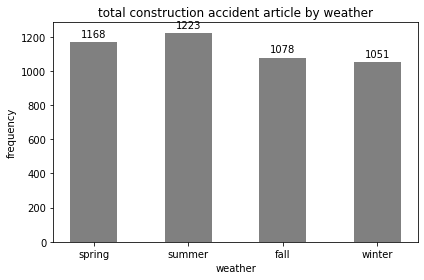

In [144]:
dist_weather = get_dist_weather(df_arrange)


fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_weather.keys())[:-1],list(dist_weather.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('weather')
#ax.set_ylim(0,260)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rect1)        
        
#plt.title("Frequency of keywords")
plt.title("total construction accident article by weather")
fig.tight_layout()


plt.savefig('Figure/section2/weather_distribution.png')


Distrubution of weather with fire

In [147]:
def get_dist_weather_keyword(df,key) :
    spring_cnt = 0
    summer_cnt =0
    fall_cnt =0
    winter_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"weather"] =='spring' :
            #print(type(df.loc[i,"bodies"]))
            if key in df.loc[i,"body"] :
                spring_cnt +=1
        elif df.loc[i,"weather"] =='summer' :
            if key in df.loc[i,"body"] :
                summer_cnt +=1
        elif df.loc[i,"weather"] =='fall' :
            if key in df.loc[i,"body"] :
                fall_cnt +=1
        elif df.loc[i,"weather"] =='winter' :
            if key in df.loc[i,"body"] :
                winter_cnt +=1
        else :
                none_cnt +=0
    
    fin_set_fire = {}
    fin_set_fire['spring'] = spring_cnt
    fin_set_fire['summer'] = summer_cnt
    fin_set_fire['fall'] = fall_cnt
    fin_set_fire['winter'] = winter_cnt
    fin_set_fire['none'] = none_cnt
    
    return fin_set_fire


In [166]:
get_dist_weather_keyword(df_arrange,"explosion")


{'spring': 79, 'summer': 89, 'fall': 76, 'winter': 83, 'none': 0}

In [149]:
def get_dist_month(df) :
    jan_cnt = 0
    feb_cnt = 0 
    mar_cnt = 0
    apr_cnt = 0 
    may_cnt = 0 
    jun_cnt = 0
    jul_cnt = 0
    aug_cnt = 0
    sep_cnt = 0
    ocb_cnt = 0
    nov_cnt = 0
    dec_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"month"] =='january' :
            #print(type(df.loc[i,"bodies"]))
       
            jan_cnt +=1
        elif df.loc[i,"month"] =='february' :
        
            feb_cnt +=1
        elif df.loc[i,"month"] =='march' :
        
            mar_cnt +=1
        elif df.loc[i,"month"] =='april' :
   
            apr_cnt +=1
        elif df.loc[i,"month"] =='may' :
     
            may_cnt +=1
        elif df.loc[i,"month"] =='june' :
            
            jun_cnt +=1
        elif df.loc[i,"month"] =='july' :
          
            jul_cnt +=1
        elif df.loc[i,"month"] =='august' :
           
            aug_cnt +=1
        elif df.loc[i,"month"] =='september' :
          
            sep_cnt +=1
        elif df.loc[i,"month"] =='october' :
           
            ocb_cnt +=1
        elif df.loc[i,"month"] =='november' :
            
            nov_cnt +=1
        elif df.loc[i,"month"] =='december' :
            
            dec_cnt +=1
        else :
            none_cnt +=1
    
    fin_set_mon = {}
    fin_set_mon['january'] = jan_cnt
    fin_set_mon['february'] = feb_cnt
    fin_set_mon['march'] = mar_cnt
    fin_set_mon['april'] = apr_cnt
    fin_set_mon['may'] = may_cnt
    fin_set_mon['june'] = jun_cnt
    fin_set_mon['july'] = jul_cnt
    fin_set_mon['august'] = aug_cnt
    fin_set_mon['september'] = sep_cnt
    fin_set_mon['octoboer'] = ocb_cnt
    fin_set_mon['november'] = nov_cnt
    fin_set_mon['december'] = dec_cnt
    fin_set_mon['none'] = none_cnt
    
    
    return fin_set_mon


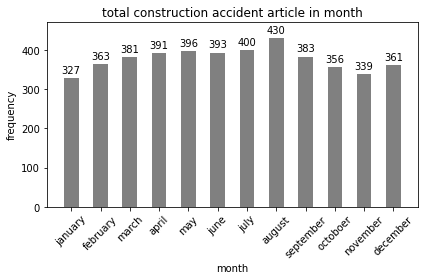

In [163]:
dist_month = get_dist_month(df_arrange)

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month.keys())[:-1],list(dist_month.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,470)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("total construction accident article in month")
fig.tight_layout()
plt.savefig('Figure/section2/month_distribution.png')
plt.show()

In [153]:
def get_dist_month_keyword(df,key) :
    jan_cnt = 0
    feb_cnt = 0 
    mar_cnt = 0
    apr_cnt = 0 
    may_cnt = 0 
    jun_cnt = 0
    jul_cnt = 0
    aug_cnt = 0
    sep_cnt = 0
    ocb_cnt = 0
    nov_cnt = 0
    dec_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"month"] =='january' :
            #print(type(df.loc[i,"bodies"]))
            if key in df.loc[i,"body"] :
                jan_cnt +=1
        elif df.loc[i,"month"] =='february' :
            if key in df.loc[i,"body"] :
                feb_cnt +=1
        elif df.loc[i,"month"] =='march' :
            if key in df.loc[i,"body"] :
                mar_cnt +=1
        elif df.loc[i,"month"] =='april' :
            if key in df.loc[i,"body"] :
                apr_cnt +=1
        elif df.loc[i,"month"] =='may' :
            if key in df.loc[i,"body"] :
                may_cnt +=1
        elif df.loc[i,"month"] =='june' :
            if key in df.loc[i,"body"] :
                jun_cnt +=1
        elif df.loc[i,"month"] =='july' :
            if key in df.loc[i,"body"] :
                jul_cnt +=1
        elif df.loc[i,"month"] =='august' :
            if key in df.loc[i,"body"] :
                aug_cnt +=1
        elif df.loc[i,"month"] =='september' :
            if key in df.loc[i,"body"] :
                sep_cnt +=1
        elif df.loc[i,"month"] =='october' :
            if key in df.loc[i,"body"] :
                ocb_cnt +=1
        elif df.loc[i,"month"] =='november' :
            if key in df.loc[i,"body"] :
                nov_cnt +=1
        elif df.loc[i,"month"] =='december' :
            if key in df.loc[i,"body"] :
                dec_cnt +=1
        else :
                none_cnt +=0
    
    fin_set_mon = {}
    fin_set_mon['january'] = jan_cnt
    fin_set_mon['february'] = feb_cnt
    fin_set_mon['march'] = mar_cnt
    fin_set_mon['april'] = apr_cnt
    fin_set_mon['may'] = may_cnt
    fin_set_mon['june'] = jun_cnt
    fin_set_mon['july'] = jul_cnt
    fin_set_mon['august'] = aug_cnt
    fin_set_mon['september'] = sep_cnt
    fin_set_mon['octoboer'] = ocb_cnt
    fin_set_mon['november'] = nov_cnt
    fin_set_mon['december'] = dec_cnt
    fin_set_mon['none'] = none_cnt
    
    
    return fin_set_mon


In [154]:
get_dist_month_keyword(df_arrange,'fire')

{'january': 69,
 'february': 82,
 'march': 97,
 'april': 80,
 'may': 108,
 'june': 92,
 'july': 98,
 'august': 93,
 'september': 84,
 'octoboer': 73,
 'november': 83,
 'december': 86,
 'none': 0}

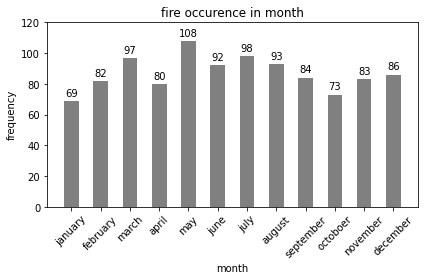

In [159]:
dist_month_fire = get_dist_month_keyword(df_arrange,'fire')

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month_fire.keys())[:-1],list(dist_month_fire.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,120)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("fire occurence in month")
fig.tight_layout()
plt.savefig('Figure/section2/month_fire_distribution.png')
plt.show()

### Start Tokenize words with nltk

In [122]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.probability import ConditionalFreqDist
from gensim.models import Word2Vec
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [125]:

#1. make lower case, regulazation
l_bodies=[]
for body in bodies :
    
    body = str(body).lower()
    l_bodies.append(body)

    
#2. removing stop words, tokenize
stop_words = set(stopwords.words('english'))

token_sentence = []
for words in l_bodies:
    word_tokens= word_tokenize(words)
    filter_sentence = [fw for fw in word_tokens if not fw in stop_words]
    
    for n in range(len(filter_sentence)) :
        if filter_sentence[n] == 'collapsed' :
            filter_sentence[n]  = 'collapse'
        elif filter_sentence[n] == 'buildings':
            filter_sentence[n] = 'building'
       
    ## fall + fell => fall (less frequency of fall just go with fell) , collapsed +collapse => collapse
    #filter_sentence = nltk.pos_tag(filter_sentence)
    token_sentence.append(filter_sentence)
    
#token_sentence
#print(l_bodies)



In [126]:
#check how many words I use 

len(token_sentence)
total_word_count = 0
for i in range(len(token_sentence)) :
    
    total_word_count += len(token_sentence[i])
print(total_word_count)
print(len(token_sentence))
print(len(l_bodies))

5090410
4565
4565


In [128]:
final_set['body'] = token_sentence
df_nyt = pd.DataFrame(final_set, columns=["date","title","body"])
df_nyt.head()

,date,title,body
0,20191230,"After Death From Falling Debris, Violations Fo...","[advertisementsupported, bythe, infractions, ,..."
1,20191225,"For Trump Organization, Office Skyscrapers Mak...","[advertisementsupported, byoffice, towers, new..."
2,20191225,Traffic Circles Are Everywhere in France. Not ...,"[advertisementsupported, byfrance, dispatchtra..."
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,"[advertisementsupported, bynew, york, today, a..."
4,20191224,A Trump Policy ‘Clarification’ All but Ends Pu...,"[advertisementsupported, byby, lisa, friedmanw..."


In [829]:
#frequency of five keywords

cnt_fire =0 
cnt_fall =0
cnt_collapse =0 
cnt_people = 0
cnt_building = 0
for token in token_sentence :
    if 'fire' in token :
        cnt_fire +=1
    if 'collapse' in token :
        cnt_collapse +=1
    if 'fell' in token :
        cnt_fall +=1
    if 'building' in token :
        cnt_building +=1
    if 'people' in token :
        cnt_people +=1
        
freq_dict = {}
freq_dict['fire'] = cnt_fire
freq_dict['fell'] = cnt_fall
freq_dict['collapse'] = cnt_collapse
freq_dict['building'] = cnt_building
freq_dict['people'] = cnt_people
print(cnt_fire, cnt_fall, cnt_collapse)
print(len(token_sentence))
type(cnt_people)

192 233 284
861


int

{'fire': 192, 'fell': 233, 'collapse': 284, 'building': 514, 'people': 492}


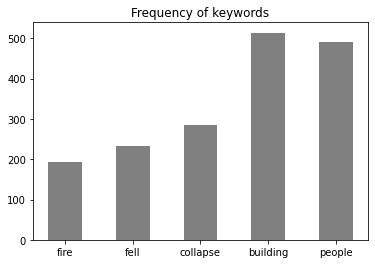

In [1027]:
#frequency histogram of five keywords

import matplotlib.pyplot as plt
print(freq_dict)
plt.bar(list(freq_dict.keys()),freq_dict.values(),width = 0.5, color ='gray')
plt.title("Frequency of keywords")
plt.savefig('frequency_keyword.pdf')

In [696]:
#start word2vec

model = Word2Vec(token_sentence, size = 400, window=5, min_count=200, workers=3, sg=0, iter=5)

In [907]:
#check similarty between 5 keywords (total 10)
#fire - collapse, fire - fell, fire - people, fire - building
#collapse - fell, collapse - people , collapse - building
#fell - people , fell - building
#building - people 
sb1 = model.similarity('building','collapse')
sb2 = model.similarity('building','fire')
sb3 = model.similarity('building','people')
sb4 = model.similarity('building','fell')
sb5 = model.similarity('fire','collapse')
sb6 = model.similarity('fire','fell')
sb7 = model.similarity('fire','people')
sb8 = model.similarity('collapse','fell')
sb9 = model.similarity('collapse','people')
sb10 = model.similarity('people','fell')

print('building and collapse', model.similarity('building','collapse'))  ## similarity between words
print('building and fire', model.similarity('building','fire')) 
print('building and people', model.similarity('building','people')) 
print('building and fell', model.similarity('building','fell'))
print('fire and collapse', model.similarity('fire','collapse'))
print('fire and fell', model.similarity('fire','fell'))
print('fire and people', model.similarity('fire','people'))
print('collapse and fell', model.similarity('collapse','fell'))
print('collpase and people', model.similarity('collapse','people'))
print('people and fell', model.similarity('people','fell'))

sim_between = [('building and collapse' , "%.3f" % sb1),('building and fire',"%.3f" % sb2), 
               ('building and people ',"%.3f" % sb3), 
               ('building and fell',"%.3f" % sb4),('collapse and fell', "%.3f" % sb8), 
               ('collapse and people',"%.3f" % sb9),('fire and collapse',"%.3f" % sb5), 
               ('fire and fell', "%.3f" % sb6), ('fire and people',"%.3f" % sb7),
              ('people and fell', "%.3f" % sb10)]
df_sim_between = pd.DataFrame(sim_between, columns=['Words', 'Similarity'])
df_sim_between.to_csv('Figure/sim_between_0521.csv')

building and collapse 0.5535143
building and fire 0.5253745
building and people -0.1435263
building and fell 0.44253662
fire and collapse 0.69090945
fire and fell 0.7277216
fire and people 0.33135825
collapse and fell 0.95054793
collpase and people 0.5097592
people and fell 0.4861988


/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similarity` (Method wi

In [698]:
model.similarity('building','fire') 

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.5253745

In [871]:
# generate similar word with threshold and graph 

key_list = ['fire','fell','collapse','building','people']
def network_gen(key_list,thres,sav_name) :
    set_of_g={}
    for key in key_list :
        
        
        sim_list = model.similar_by_vector(key, topn=100, restrict_vocab=None)
        network = [sim_list[i][0] for i in range(len(sim_list)) if sim_list[i][1] >= thres]
        network_df = [sim_list[i] for i in range(len(sim_list)) if sim_list[i][1] >= thres]
  
        
        set_of_g[key] = network
      
        df_word = pd.DataFrame(network_df, columns= ['Word', 'Similarity'])
        df_word.to_csv('Similar_words_100/'+key+str(thres)+'.csv')
    
    #generate graph
    #print(set_of_g)
    G = nx.Graph(set_of_g)
    nx.write_gml(G, "Network/"+sav_name+".gml")
    
    return "Success!"
    

In [872]:
network_gen(key_list, 0.5,'network1')

{'fire': ['said.the', 'police', 'scene', 'taken', 'cause', 'investigators', 'authorities', 'hospital', 'injuries', 'chief', 'night', 'floor', 'spokesman', 'man', 'dead', 'monday', 'friday', 'driver', 'investigation', 'later', 'truck', 'found', 'yesterday', 'officials', 'death', 'worker', 'fell', 'working', 'said', 'tuesday', 'site', 'crash', 'morning', 'debris', 'side', 'left', 'collapse', 'thursday', 'across', 'center', 'top', 'accident', 'avenue', 'office', 'district', 'told', 'second', 'took', 'official', 'street', 'mr.', 'ground', 'occurred', 'concrete', 'injured', 'began', 'brooklyn', 'charges', 'west', 'away', 'area', 'car', 'j.', 'east', 'steel', 'mayor', 'news', 'ms.', 'wall', 'department', 'several', 'hours', 'involved', 'manhattan', 'house', 'came', 'building', 'place', 'right', 'commissioner'], 'fell': ['west', 'collapse', 'side', 'east', 'floor', 'debris', 'ground', 'street', 'across', 'friday', 'second', 'avenue', 'occurred', 'death', 'morning', 'worker', 'yesterday', 'inj

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  if __name__ == '__main__':


'Success!'

In [873]:
# top 20 data for graph coloring, top 50 data for showing, top 100 data for make network graph


sim_list_fire = model.similar_by_vector('fire', topn=20, restrict_vocab=None)
sim_list_fall = model.similar_by_vector('fell', topn=20, restrict_vocab=None)
sim_list_collapse = model.similar_by_vector('collapse', topn=20, restrict_vocab=None)
sim_list_building = model.similar_by_vector('building', topn=20, restrict_vocab=None)
sim_list_people = model.similar_by_vector('people', topn=20, restrict_vocab= None)



/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  after removing the cwd from sys.path.
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  import sys
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher

In [903]:
# list of similiar 20 words -> generating color in UMAP

sim_fire_word = []
for i in range(len(sim_list_fire)) :
    sim_fire_word.append(sim_list_fire[i][0])
#print(sim_fire_word)
sim_fell_word = []
for i in range(len(sim_list_fall)) :
    sim_fell_word.append(sim_list_fall[i][0])
#print(sim_fall_word)
sim_collapse_word =[]
for i in range(len(sim_list_collapse)):
    sim_collapse_word.append(sim_list_collapse[i][0])
#print(sim_collapse_word)
sim_building_word = []
for i in range(len(sim_list_building)):
    sim_building_word.append(sim_list_building[i][0])
#print(sim_building_word)
sim_people_word = []
for i in range(len(sim_list_people)):
    sim_people_word.append(sim_list_people[i][0])
#print(sim_people_word)

keywords = ['fire','fell','collapse','building','people']
keyword_dict = {}

for keyword in keywords :
    a = 'sim_%s_word'%(keyword)
    ##local varible same name with a
    
    keyword_dict[keyword] = locals()[a]
    
df_keyword = pd.DataFrame.from_dict(keyword_dict)
#df_keyword.to_csv('keyword_simlist.csv')



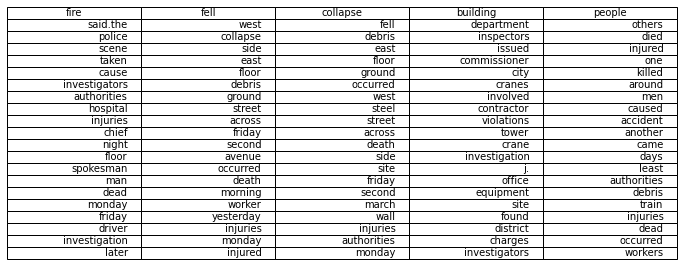

In [898]:
from matplotlib.backends.backend_pdf import PdfPages
fig, ax = plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = df_keyword.values, colLabels = df_keyword.columns, loc = 'center')
pp = PdfPages("simlist.pdf")
pp.savefig(fig,bbox_inches = 'tight')

In [899]:
df_keyword

,fire,fell,collapse,building,people
0,said.the,west,fell,department,others
1,police,collapse,debris,inspectors,died
2,scene,side,east,issued,injured
3,taken,east,floor,commissioner,one
4,cause,floor,ground,city,killed
5,investigators,debris,occurred,cranes,around
6,authorities,ground,west,involved,men
7,hospital,street,steel,contractor,caused
8,injuries,across,street,violations,accident
9,chief,friday,across,tower,another


In [702]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from umap import UMAP

In [703]:
reducer = UMAP(n_neighbors =5, min_dist =0.1, n_components = 2, verbose = True)

In [704]:
len(token_sentence)

861

In [762]:
X = model[model.wv.vocab]

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [763]:
#list of word
X_l = list(model.wv.vocab)
print(len(X_l))
#print(X_l)

285


In [764]:
X.shape

(285, 400)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=5, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Thu Apr  9 13:27:07 2020 Finding Nearest Neighbors
Thu Apr  9 13:27:07 2020 Finished Nearest Neighbor Search
Thu Apr  9 13:27:07 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Apr  9 13

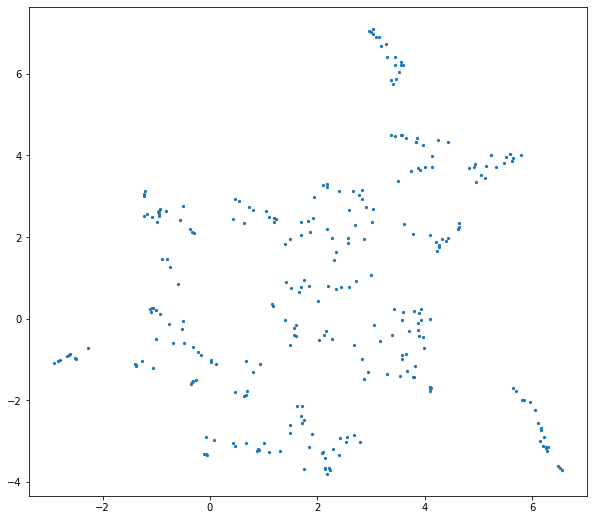

In [765]:
cluster_embedding = reducer.fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:,0], cluster_embedding[:,1],s=5,cmap='tab10')

In [766]:
df = pd.DataFrame(cluster_embedding)

In [767]:
#coordinate of words

df

,0,1
0,-0.807685,1.462215
1,4.197803,1.868301
2,2.138629,-3.408409
3,1.486671,-2.618109
4,2.795085,-3.027621
...,...,...
280,-2.277071,-0.721042
281,-2.621548,-0.886539
282,1.106151,2.491671
283,-2.652903,-0.914760


/Users/macbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)


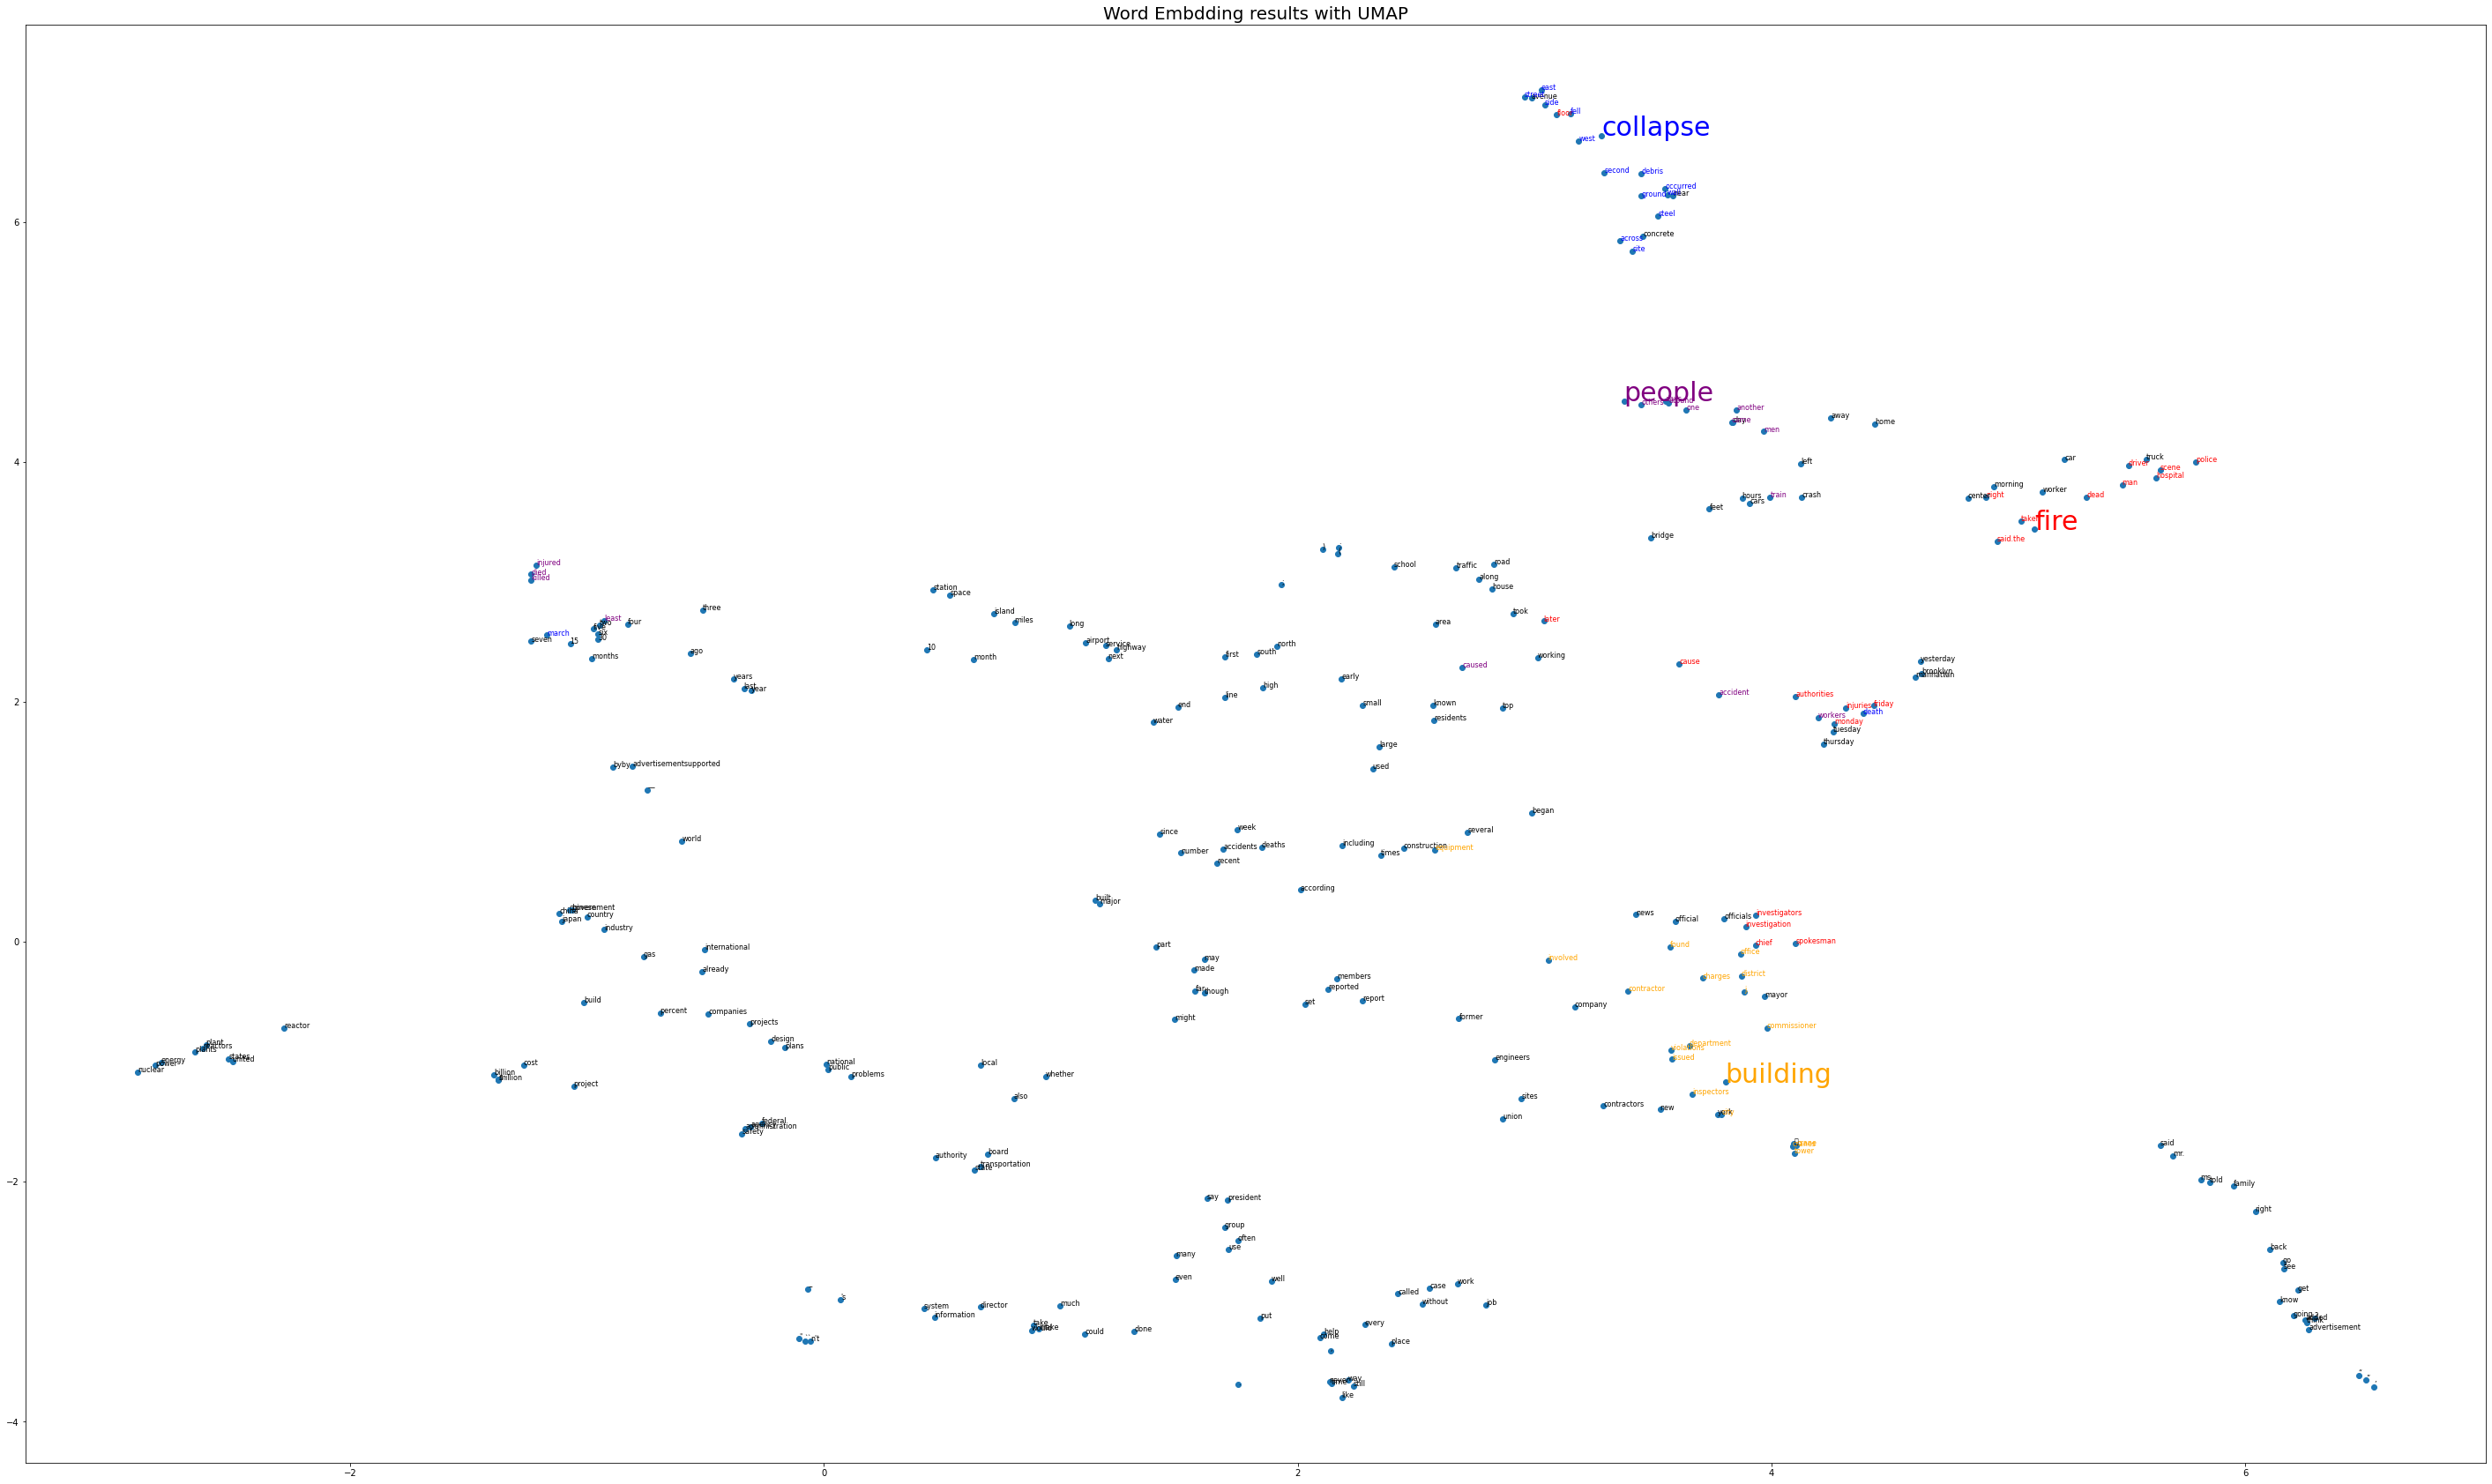

In [912]:
fig = plt.figure()
fig.set_size_inches(50,30)
ax = fig.add_subplot(1,1,1)

ax.scatter(df[0],df[1])

for i, txt in enumerate(X_l):
    
    if txt == 'fire' :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color = 'red', fontsize=30)
    elif txt in sim_fire_word :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color ='red', fontsize=8)
        

        
   #elif txt =='fell' :
        #ax.annotate(txt, (df.loc[i][0],df.loc[i][1]),color='green', fontsize=30)
        
    #elif txt in sim_fall_word :
        #ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color ='green', fontsize=8)  
        
    elif txt =='collapse' :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color = 'blue', fontsize=30)
    elif txt in sim_collapse_word :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color ='blue', fontsize=8)
    
    elif txt =='building' :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color ='orange', fontsize=30)
    elif txt in sim_building_word :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color ='orange', fontsize=8)

      
    
    elif txt =='people' :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]),color = 'purple', fontsize=30)
    elif txt in sim_people_word :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), color ='purple', fontsize=8)
    else :
        ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), fontsize=8)
plt.title ("Word Embdding results with UMAP", fontsize = 20)
plt.savefig('fire_word2vec_0521_best_fell.pdf')